# Air Analysis

## Team Names

- Antonio Aldair Gonzalez Serrano
- Luis Esteban Barranco Guida
- Luis Gerardo Guzmán Rojas
- Miguel Ángel Ramírez García
- Uzmar de Jesús Gómez Yáñez

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import anderson
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm

In [2]:
dfpa15 = pd.DataFrame(pd.read_excel(open('Files/presion_2015PA.xls','rb'), sheet_name='2015PA'))
dfpm2515 = pd.DataFrame(pd.read_excel(open('Files/2015PM25.xls','rb'), sheet_name='2015PM25'))
dfrh15 = pd.DataFrame(pd.read_excel(open('Files/2015RH.xls','rb'), sheet_name='2015RH'))
dftmp15 = pd.DataFrame(pd.read_excel(open('Files/2015TMP.xls','rb'), sheet_name='2015TMP'))
dfwdr15 = pd.DataFrame(pd.read_excel(open('Files/2015WDR.xls','rb'), sheet_name='2015WDR'))
dfwsp15 = pd.DataFrame(pd.read_excel(open('Files/2015WSP.xls','rb'), sheet_name='2015WSP'))

In [3]:
dfpa16 = pd.DataFrame(pd.read_excel(open('Files/2016PA.xls','rb'), sheet_name='2016PA'))
dfpm2516 = pd.DataFrame(pd.read_excel(open('Files/2016PM25.xls','rb'), sheet_name='2016PM25'))
dfrh16= pd.DataFrame(pd.read_excel(open('Files/2016RH.xls','rb'), sheet_name='2016RH'))
dftmp16 = pd.DataFrame(pd.read_excel(open('Files/2016TMP.xls','rb'), sheet_name='2016TMP'))
dfwdr16 = pd.DataFrame(pd.read_excel(open('Files/2016WDR.xls','rb'), sheet_name='2016WDR'))
dfwsp16 = pd.DataFrame(pd.read_excel(open('Files/2016WSP.xls','rb'), sheet_name='2016WSP'))

In [4]:
dfpa17 = pd.DataFrame(pd.read_excel(open('Files/presion_2017PA.xls','rb'), sheet_name='2017PA'))
dfpm2517 = pd.DataFrame(pd.read_excel(open('Files/2017PM25.xls','rb'), sheet_name='2017PM25'))
dfrh17= pd.DataFrame(pd.read_excel(open('Files/2017RH.xls','rb'), sheet_name='2017RH'))
dftmp17 = pd.DataFrame(pd.read_excel(open('Files/2017TMP.xls','rb'), sheet_name='2017TMP'))
dfwdr17 = pd.DataFrame(pd.read_excel(open('Files/2017WDR.xls','rb'), sheet_name='2017WDR'))
dfwsp17 = pd.DataFrame(pd.read_excel(open('Files/2017WSP.xls','rb'), sheet_name='2017WSP'))

In [5]:
df15 = pd.concat([dfpa15["FECHA"],dfpa15["HORA"],dfpa15["HGM"],dfrh15["HGM"],dftmp15["HGM"],
                dfwdr15["HGM"],dfwsp15["HGM"],dfpm2515["HGM"]],axis=1,ignore_index=True)
df15.rename(columns={0:"FECHA",1:"HORA",2:"PRESION",3:"HUMEDAD",4:"TEMP",5:"WDIR",6:"WVEL",7:"PM25"},inplace=True)
df15.head()

,FECHA,HORA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,PM25
0,2015-01-01,1,-99,-99,-99.0,-99,-99.0,85
1,2015-01-01,2,-99,-99,-99.0,-99,-99.0,104
2,2015-01-01,3,-99,-99,-99.0,-99,-99.0,112
3,2015-01-01,4,-99,-99,-99.0,-99,-99.0,139
4,2015-01-01,5,-99,-99,-99.0,-99,-99.0,125


In [6]:
df16 = pd.concat([dfpa16["FECHA"],dfpa16["HORA"],dfpa16["HGM"],dfrh16["HGM"],dftmp16["HGM"],
                dfwdr16["HGM"],dfwsp16["HGM"],dfpm2516["HGM"]],axis=1,ignore_index=True)
df16.rename(columns={0:"FECHA",1:"HORA",2:"PRESION",3:"HUMEDAD",4:"TEMP",5:"WDIR",6:"WVEL",7:"PM25"},inplace=True)
df16.head()

,FECHA,HORA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,PM25
0,2016-01-01,1,586,52,17.1,51,0.5,68
1,2016-01-01,2,586,52,16.6,11,1.0,98
2,2016-01-01,3,586,56,15.7,300,1.1,119
3,2016-01-01,4,586,60,14.8,353,0.7,149
4,2016-01-01,5,586,67,13.5,62,1.3,150


In [7]:
df17 = pd.concat([dfpa17["Fecha"],dfpa17["Hora"],dfpa17["HGM"],dfrh17["HGM"],dftmp17["HGM"],
                dfwdr17["HGM"],dfwsp17["HGM"],dfpm2517["HGM"]],axis=1,ignore_index=True)
df17.rename(columns={0:"FECHA",1:"HORA",2:"PRESION",3:"HUMEDAD",4:"TEMP",5:"WDIR",6:"WVEL",7:"PM25"},inplace=True)
df17.head()

,FECHA,HORA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,PM25
0,2017-01-01,1,585,57,14.3,221,0.6,-99
1,2017-01-01,2,585,55,13.9,231,1.0,-99
2,2017-01-01,3,585,57,13.8,115,0.9,-99
3,2017-01-01,4,585,58,13.6,155,0.6,-99
4,2017-01-01,5,585,61,13.1,106,0.8,-99


In [8]:
df = pd.concat([df15, df16, df17])
df.shape

(26304, 8)

In [9]:
df2 = df.resample('W', on='FECHA').median()
df2.index = df2.index + pd.DateOffset(1)

In [10]:
df2.tail()

,HORA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,PM25
FECHA,,,,,,,
2017-12-04,12.5,586.0,46.5,13.50,247.0,1.30,32.5
2017-12-11,12.5,586.0,36.5,14.55,199.0,1.25,20.5
2017-12-18,12.5,585.0,35.0,14.60,100.0,1.10,33.0
2017-12-25,12.5,587.0,40.5,16.35,120.5,1.00,32.0
2018-01-01,12.5,587.0,43.0,14.45,257.0,1.10,32.0


In [11]:
df2.drop(df2.tail(1).index,inplace=True)

In [12]:
dfpph15 = pd.DataFrame(pd.read_excel(open('Files/2015PPH.xls','rb'), sheet_name='2015PPH'))
dfpph16 = pd.DataFrame(pd.read_excel(open('Files/2016PPH.xls','rb'), sheet_name='2016PPH'))
dfpph17 = pd.DataFrame(pd.read_excel(open('Files/2017PPH.xls','rb'), sheet_name='2017PPH'))

In [13]:
dfpph = pd.concat([dfpph15, dfpph16, dfpph17])

In [14]:
dfpph = dfpph[['FECHA','MCM']]
dfpph = dfpph.set_index('FECHA')

In [15]:
dfpph.head()

,MCM
FECHA,
2015-01-05,-99.0
2015-01-12,-99.0
2015-01-19,-99.0
2015-01-26,-99.0
2015-02-02,-99.0


In [16]:
dfpph.dropna(inplace=True)

In [17]:
dfpph.shape

(156, 1)

In [18]:
base = pd.merge(df2,dfpph, right_index=True,left_index=True)
base = base[["PRESION","HUMEDAD","TEMP","WDIR","WVEL","MCM","PM25"]]

In [19]:
base.head()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
FECHA,,,,,,,
2015-01-05,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,15.0
2015-01-12,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,20.0
2015-01-19,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,36.0
2015-01-26,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,29.0
2015-02-02,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [20]:
for i in base.columns:
    base[i].replace(to_replace=-99.0,value=base[base[i]!=-99.0][i].median(),regex=True,inplace=True)

In [21]:
base.head()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
FECHA,,,,,,,
2015-01-05,585.0,52.0,16.95,247.5,1.4,22.16,15.0
2015-01-12,585.0,52.0,16.95,247.5,1.4,22.16,20.0
2015-01-19,585.0,52.0,16.95,247.5,1.4,22.16,36.0
2015-01-26,585.0,52.0,16.95,247.5,1.4,22.16,29.0
2015-02-02,585.0,52.0,16.95,247.5,1.4,22.16,20.5


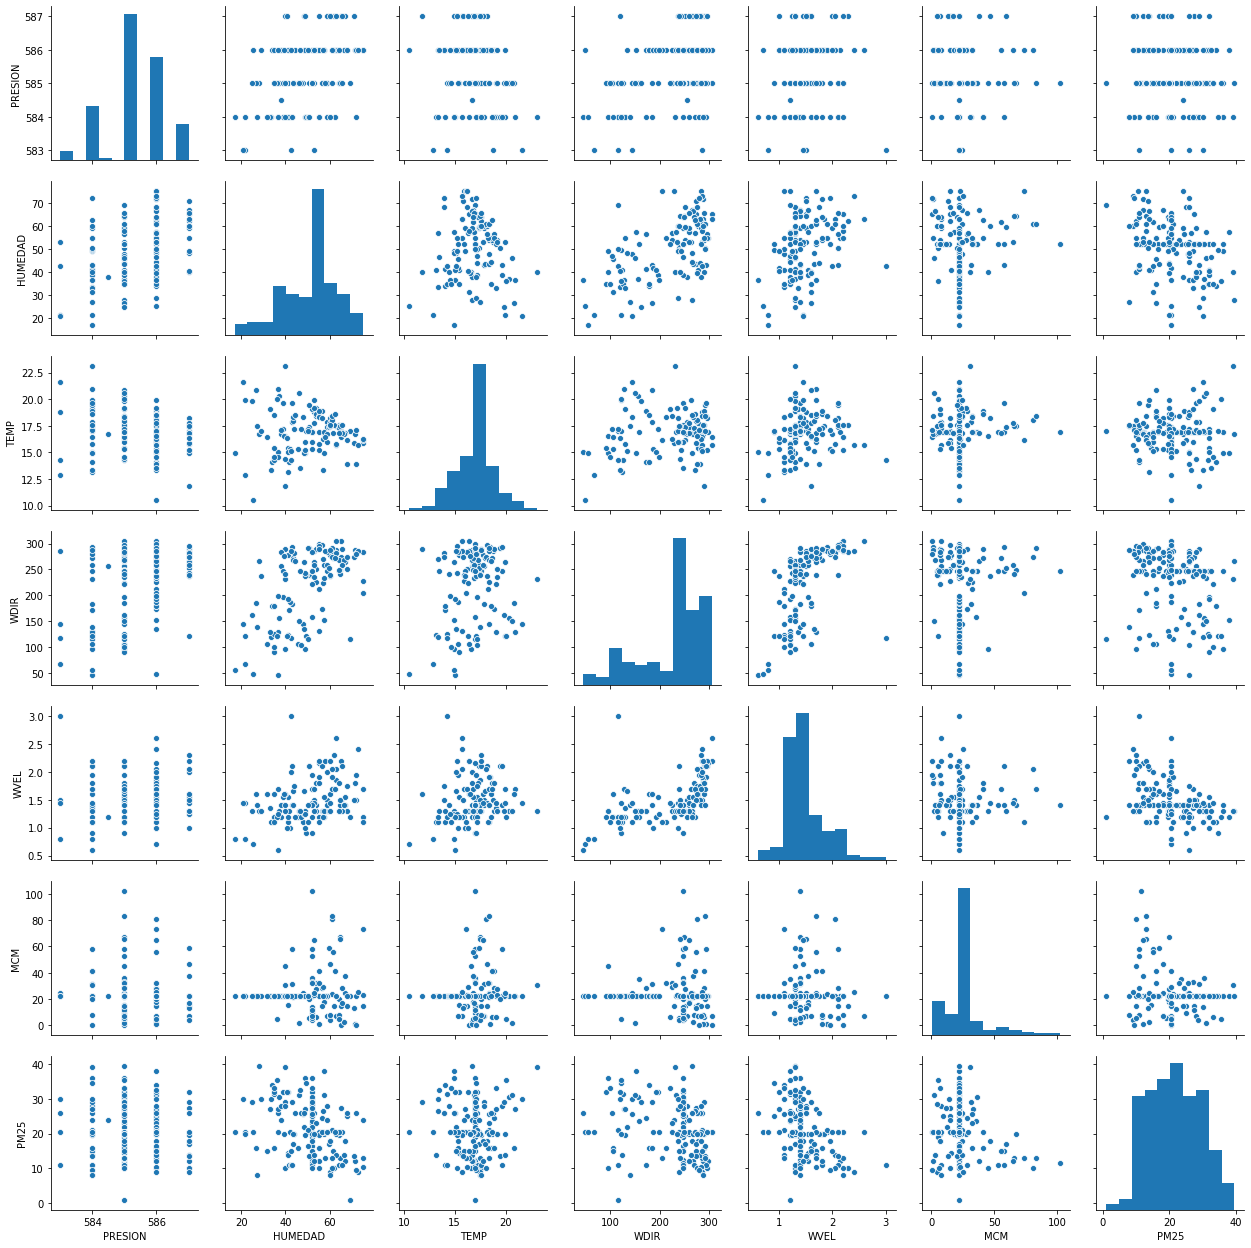

In [22]:
sns.pairplot(base)

In [23]:
base.to_csv(r'Files/basefinal.csv')

## Linear Regression

### Making the correlation matrix

In [24]:
df = pd.read_csv(r'Files/basefinal.csv')

cm = df.corr().round(2)

We can see that the features don't have a linear correlation with the target, also the wind's direction and wind's speed are linear correlated.

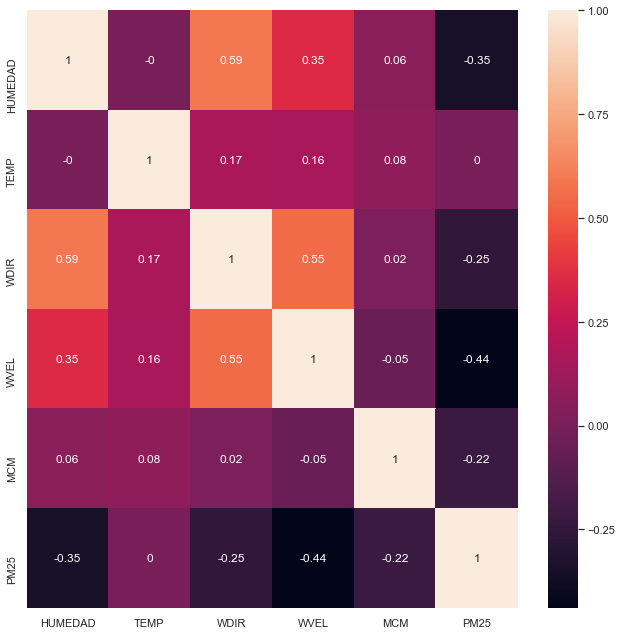

In [25]:
sns.set(rc = {'figure.figsize':(11,11)})
sns.heatmap(data =cm.iloc[1:8,1:8], annot = True)

In [26]:
df.describe()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,585.291667,50.730769,16.906410,225.717949,1.476603,24.140064,21.403846
std,0.940073,12.071345,1.808526,63.936263,0.357248,15.632417,7.687047
min,583.000000,17.000000,10.500000,45.500000,0.600000,0.370000,1.000000
25%,585.000000,42.500000,16.000000,186.875000,1.300000,22.160000,15.000000
50%,585.000000,52.000000,16.950000,247.500000,1.400000,22.160000,20.500000
75%,586.000000,59.000000,17.637500,273.000000,1.600000,22.160000,27.500000
max,587.000000,75.000000,23.100000,305.000000,3.000000,102.230000,39.500000


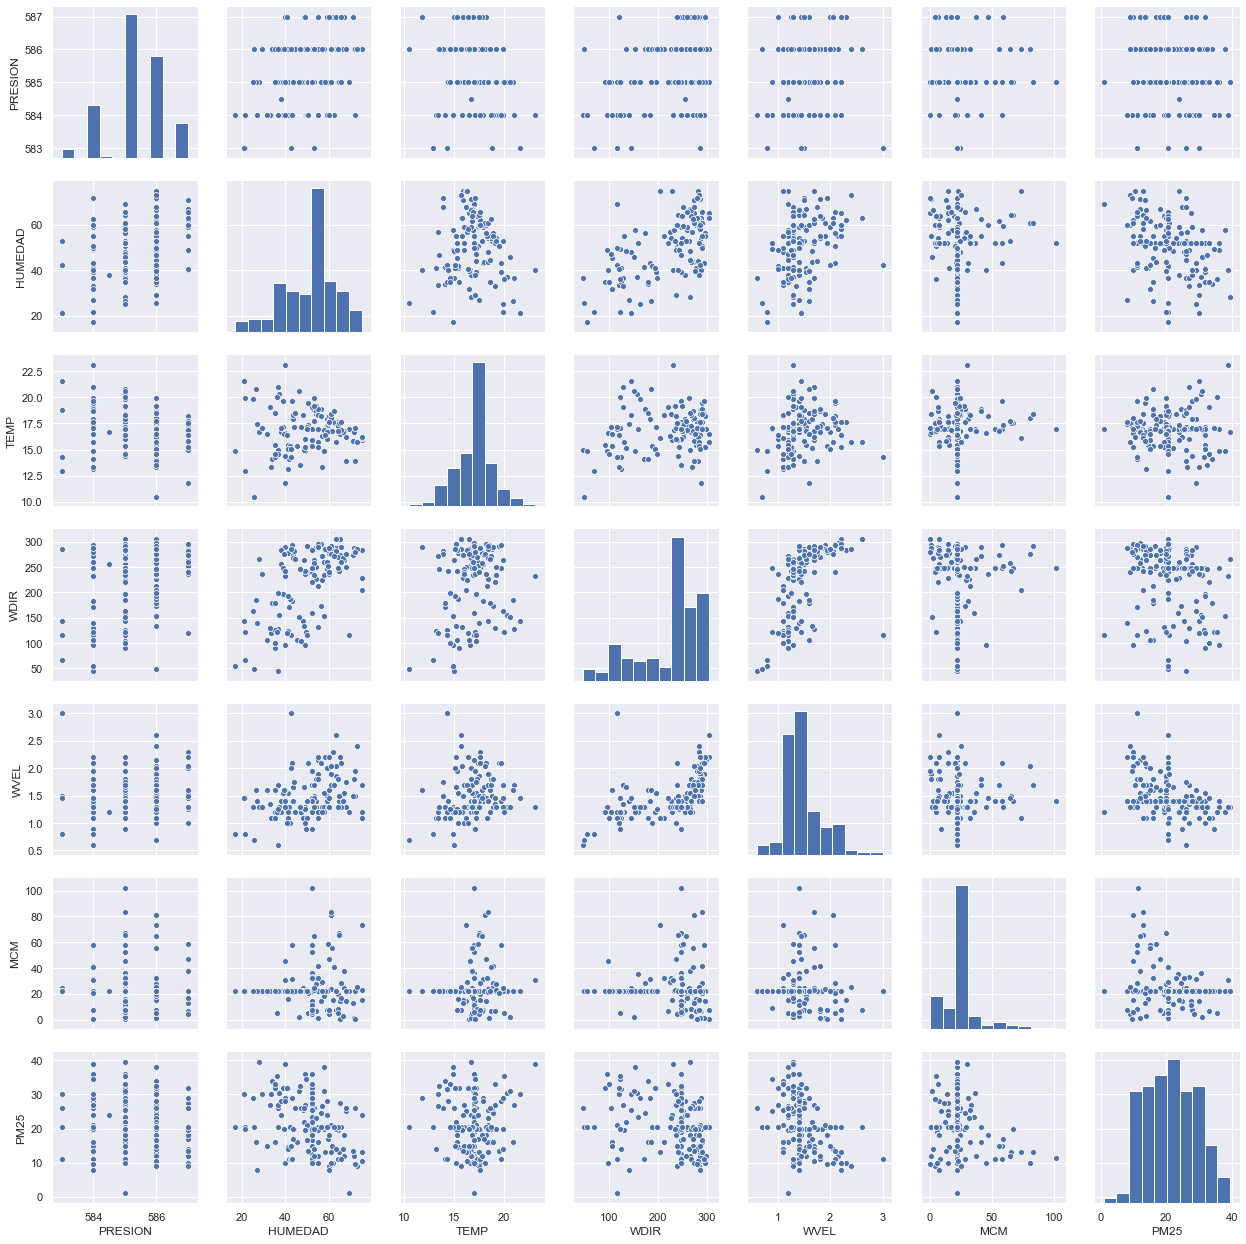

In [27]:
sns.pairplot(df[['PRESION','HUMEDAD','TEMP','WDIR','WVEL','MCM','PM25']])

### ANOVA Table

We kept the features 'HUMEDAD', 'TEMP', 'WVEL', 'MCM' to explain the target 'PM25'

In [28]:
anova = ols('PM25 ~ HUMEDAD + WVEL + MCM + WDIR', data = df).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     16.27
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.21e-11
Time:                        10:53:54   Log-Likelihood:                -511.07
No. Observations:                 156   AIC:                             1032.
Df Residuals:                     151   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.7529      2.818     15.169      0.000      37.184      48.322
HUMEDAD       -0.1810      0.054     -3.361      0.001      -0.287      -0.075
WVEL          -9.4221      1.752     -5.378      0.000     -12.884      -5.960
MCM           -0.1116      0.034     -3.319      0.001      -0.178      -0.045
WDIR           0.0197      0.011      1.733      0.085      -0.003       0.042
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.490
Skew:                          -0.125   Prob(JB):                        0.783
Kurtosis:                       2.887   Cond. No.                     1.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We applied the linear model

In [29]:
X = df[['HUMEDAD','WDIR','WVEL','MCM']]
y = df['PM25']

In [30]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
predictions= lm.predict(X)

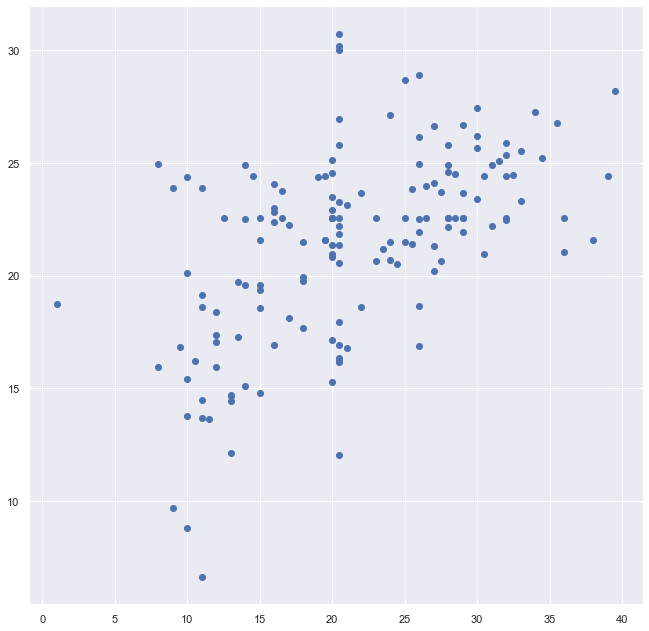

In [32]:
plt.scatter(y,predictions)

In [33]:
print('MAE: ', metrics.mean_absolute_error(y, predictions))

MAE:  5.271296856036498


### Testing assumptions

#### Normality of the residuals

In [48]:
res = y-predictions

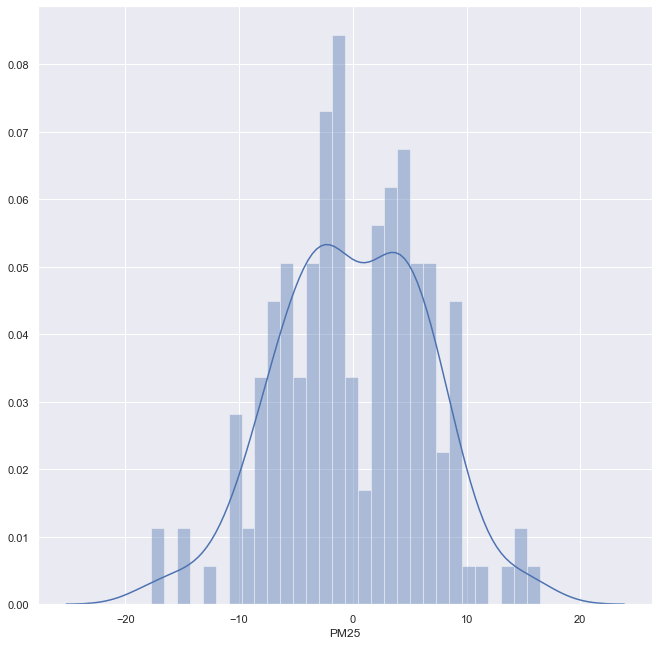

In [49]:
sns.distplot(res, bins=30)

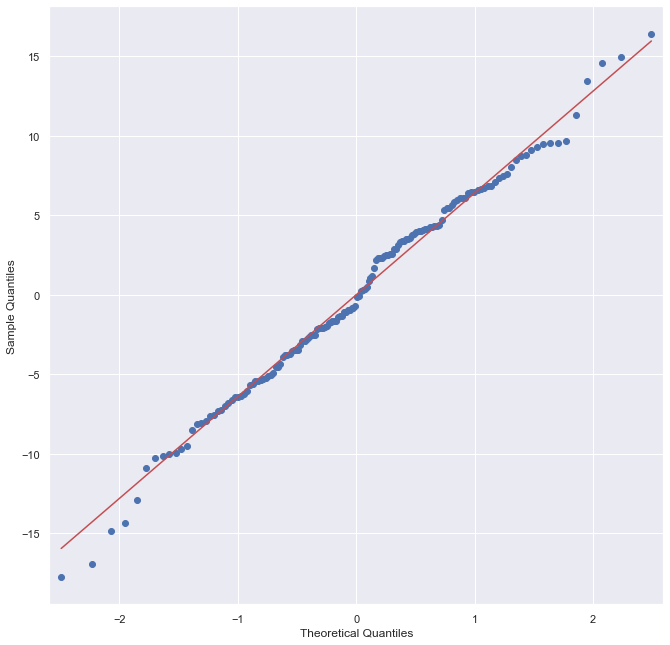

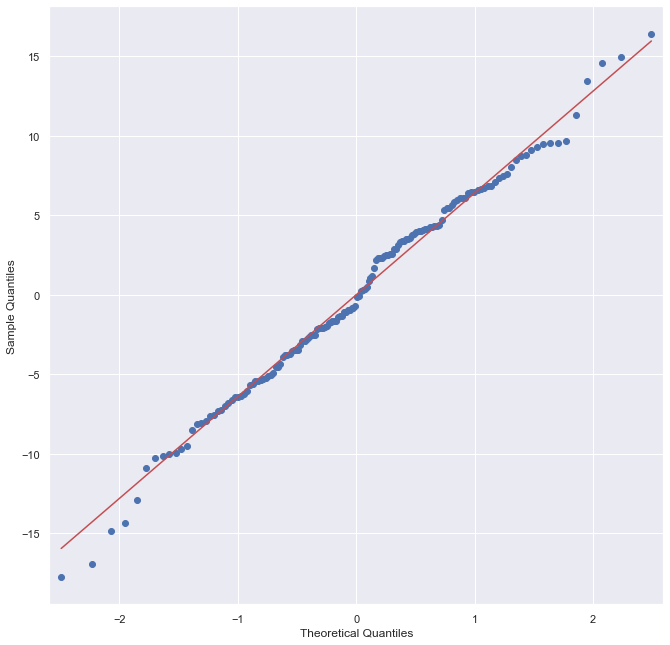

In [51]:
sm.qqplot(res, fit=True, line='s')

In [52]:
print(stats.normaltest(res))
print(stats.anderson(res, dist='norm'))
#Menor 0.05 entonces, la muestra probiene de una d norm, no hay evidencias que idiquen que no sea un d normal
print(stats.shapiro(res)[1])

NormaltestResult(statistic=0.44355887720497156, pvalue=0.8010920348293369)
AndersonResult(statistic=0.4597954462856251, critical_values=array([0.562, 0.64 , 0.768, 0.896, 1.066]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
0.5247793197631836


### Homoscedasticity

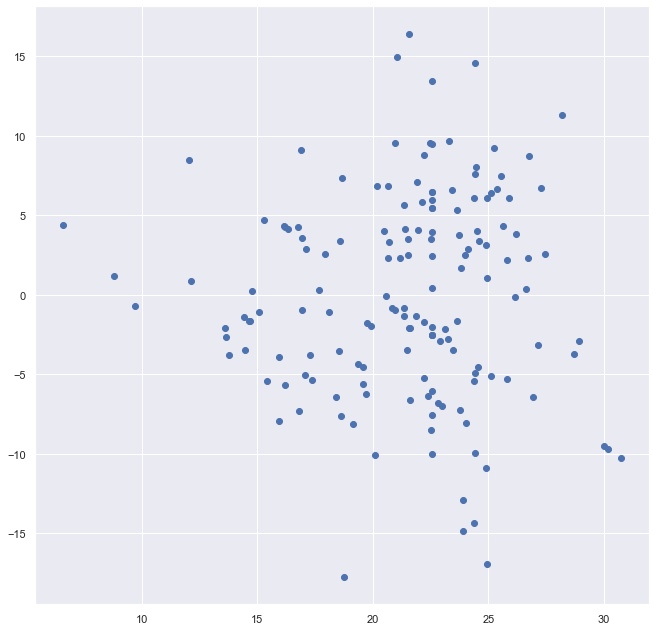

In [54]:
plt.scatter(predictions,res)

#### We conclude that there's no linearity between our features and the target

## Principal Component Analysis

### Uncategorized

In [55]:
base.head()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
FECHA,,,,,,,
2015-01-05,585.0,52.0,16.95,247.5,1.4,22.16,15.0
2015-01-12,585.0,52.0,16.95,247.5,1.4,22.16,20.0
2015-01-19,585.0,52.0,16.95,247.5,1.4,22.16,36.0
2015-01-26,585.0,52.0,16.95,247.5,1.4,22.16,29.0
2015-02-02,585.0,52.0,16.95,247.5,1.4,22.16,20.5


In [56]:
basepca=base
basepca.reset_index(inplace=True)
basepca.drop(columns=["FECHA"],inplace=True)
basepca.head()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
0,585.0,52.0,16.95,247.5,1.4,22.16,15.0
1,585.0,52.0,16.95,247.5,1.4,22.16,20.0
2,585.0,52.0,16.95,247.5,1.4,22.16,36.0
3,585.0,52.0,16.95,247.5,1.4,22.16,29.0
4,585.0,52.0,16.95,247.5,1.4,22.16,20.5


In [57]:
scaler= StandardScaler()
scaler.fit(basepca.drop(columns='PM25'))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
scaled_data = scaler.transform(basepca.drop(columns='PM25'))

In [59]:
pca = PCA(n_components=3)

In [60]:
pcaf=pca.fit(scaled_data)

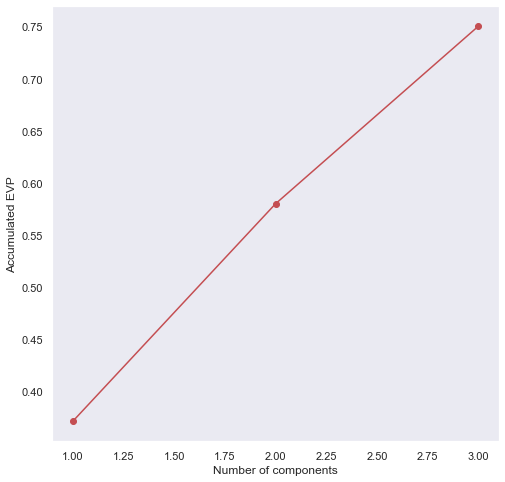

In [68]:
y=pcaf.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,8))
plt.xlabel('Number of components')
plt.ylabel('Accumulated EVP')
plt.plot(np.arange(1,len(y)+1),y,'ro-')
plt.grid()
plt.show()

In [69]:
x_pca = pca.transform(scaled_data)

In [70]:
pd.DataFrame(x_pca).head()

,0,1,2
0,-0.043345,-0.114148,-0.099836
1,-0.043345,-0.114148,-0.099836
2,-0.043345,-0.114148,-0.099836
3,-0.043345,-0.114148,-0.099836
4,-0.043345,-0.114148,-0.099836


In [71]:
scaled_data.shape

(156, 6)

In [72]:
x_pca.shape

(156, 3)

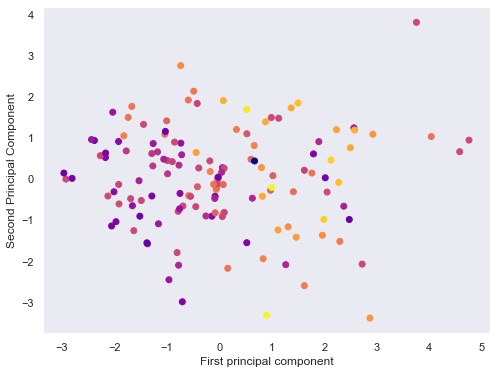

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=basepca['PM25'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid()

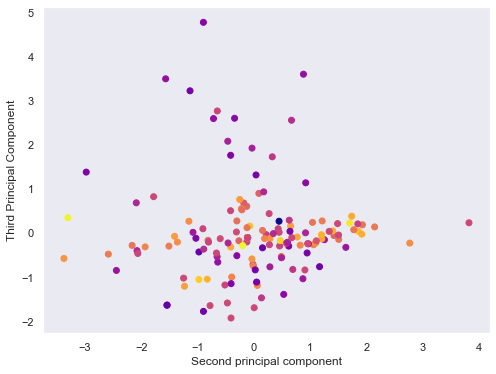

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2],c=basepca['PM25'],cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.grid()

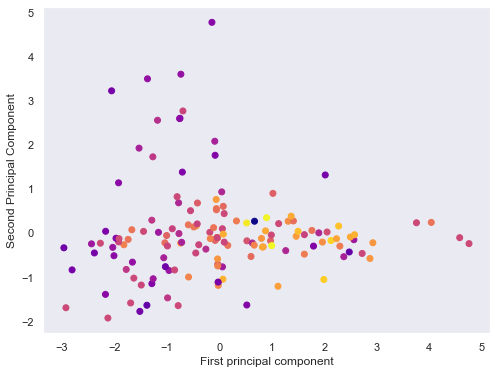

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=basepca['PM25'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.grid()

### Categorizado

In [76]:
def categoriza(s):
    if s>0.0 and s<=15.0:
        return "Regular"
    elif s>15 and s<=30:
        return "Bad"
    elif s>30:
        return "Dangerous"

In [77]:
basepca=base
basepca['PM25']= basepca['PM25'].apply(categoriza)

In [78]:
basepca.head()

,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
0,585.0,52.0,16.95,247.5,1.4,22.16,Regular
1,585.0,52.0,16.95,247.5,1.4,22.16,Bad
2,585.0,52.0,16.95,247.5,1.4,22.16,Dangerous
3,585.0,52.0,16.95,247.5,1.4,22.16,Bad
4,585.0,52.0,16.95,247.5,1.4,22.16,Bad


In [79]:
features = ['PRESION','HUMEDAD','TEMP','WDIR','WVEL','MCM']

In [80]:
x=basepca.loc[:,features].values
y=basepca.loc[:,['PM25']].values

In [81]:
x = StandardScaler().fit_transform(x)

In [82]:
pca = PCA(n_components=2)
pC = pca.fit_transform(x)
pdf = pd.DataFrame(data = pC, columns = ['principal component 1', 'principal component 2'])

In [83]:
fdf = pd.concat([pdf, basepca[['PM25']]], axis = 1)

In [84]:
fdf.head()

,principal component 1,principal component 2,PM25
0,-0.043345,-0.114148,Regular
1,-0.043345,-0.114148,Bad
2,-0.043345,-0.114148,Dangerous
3,-0.043345,-0.114148,Bad
4,-0.043345,-0.114148,Bad


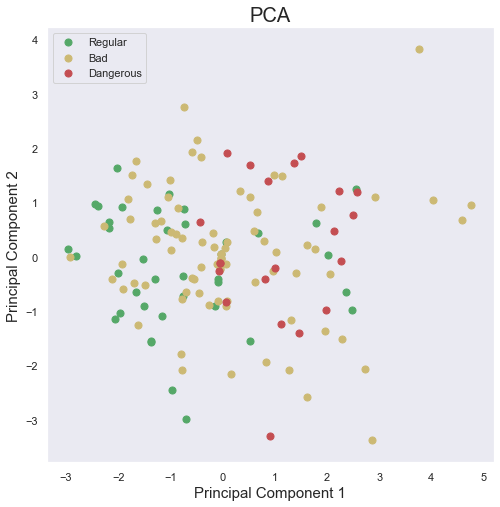

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['Regular', 'Bad', 'Dangerous']
colors = ['g', 'y', 'r']
for target, color in zip(targets,colors):
    indices = fdf['PM25'] == target
    ax.scatter(fdf.loc[indices, 'principal component 1']
               , fdf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## LDA

In [86]:
bj_df=pd.read_csv("Files\\basefinal.csv")
bj_df.head()

,FECHA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25
0,2015-01-05,585.0,52.0,16.95,247.5,1.4,22.16,15.0
1,2015-01-12,585.0,52.0,16.95,247.5,1.4,22.16,20.0
2,2015-01-19,585.0,52.0,16.95,247.5,1.4,22.16,36.0
3,2015-01-26,585.0,52.0,16.95,247.5,1.4,22.16,29.0
4,2015-02-02,585.0,52.0,16.95,247.5,1.4,22.16,20.5


In [87]:
bj_df['CPM25']= bj_df['PM25'].apply(categoriza)

In [88]:
bj_df.head()

,FECHA,PRESION,HUMEDAD,TEMP,WDIR,WVEL,MCM,PM25,CPM25
0,2015-01-05,585.0,52.0,16.95,247.5,1.4,22.16,15.0,Regular
1,2015-01-12,585.0,52.0,16.95,247.5,1.4,22.16,20.0,Bad
2,2015-01-19,585.0,52.0,16.95,247.5,1.4,22.16,36.0,Dangerous
3,2015-01-26,585.0,52.0,16.95,247.5,1.4,22.16,29.0,Bad
4,2015-02-02,585.0,52.0,16.95,247.5,1.4,22.16,20.5,Bad


In [89]:
 bj_df.drop(["PM25"], inplace = True, axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler
features = bj_df.columns[1:-1]
x = bj_df.loc[:,features].values
y = bj_df.loc[:,"CPM25"].values
x = StandardScaler().fit_transform(x)

In [91]:
features

Index(['PRESION', 'HUMEDAD', 'TEMP', 'WDIR', 'WVEL', 'MCM'], dtype='object')

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x, y)
lbj_df = pd.DataFrame(data = X_lda, columns = ["LDA1", "LDA2"])

In [93]:
lbj_df.head()

,LDA1,LDA2
0,-0.259921,0.713825
1,-0.259921,0.713825
2,-0.259921,0.713825
3,-0.259921,0.713825
4,-0.259921,0.713825


In [94]:
f_lbj_df = pd.concat([lbj_df, bj_df["CPM25"]], axis=1)
f_lbj_df.head()

,LDA1,LDA2,CPM25
0,-0.259921,0.713825,Regular
1,-0.259921,0.713825,Bad
2,-0.259921,0.713825,Dangerous
3,-0.259921,0.713825,Bad
4,-0.259921,0.713825,Bad


In [95]:
lda.explained_variance_ratio_

array([0.88340912, 0.11659088])

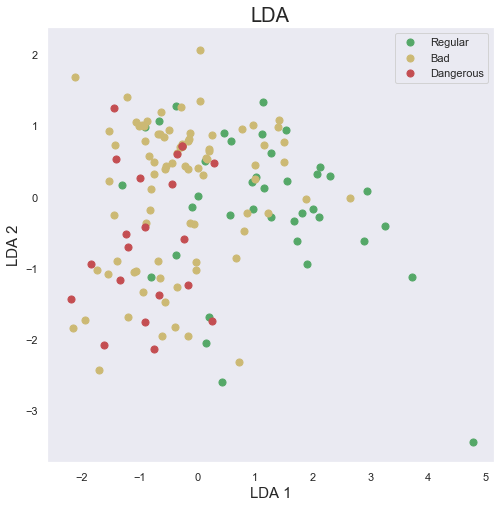

In [96]:
fig= plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA', fontsize = 20)
targets = ['Regular', 'Bad', 'Dangerous']
colors = ['g', 'y', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = f_lbj_df["CPM25"] == target
    ax.scatter(f_lbj_df.loc[indicesToKeep, 'LDA1']
               , f_lbj_df.loc[indicesToKeep, 'LDA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()